[0]
[0]


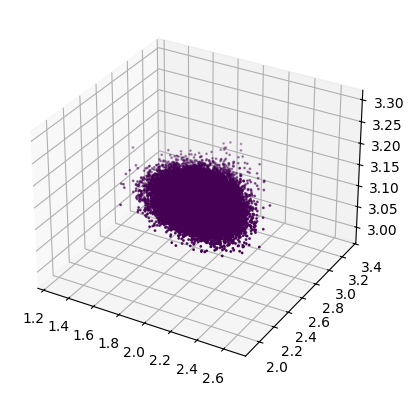

In [63]:
from dadapy import Data
import numpy as np
from matplotlib import pyplot as plt

density_maxk = 100

ds = np.load("/home/angiod@usi.ch/PHASE/data/projects/prod/systems/api/descriptors/Active_descriptors.npz")
ds2 = np.load("/home/angiod@usi.ch/PHASE/data/projects/prod/systems/api/descriptors/Inactive_descriptors.npz")
sel = 'res_59'
emb = np.vstack([ds[sel][:, 0], ds2[sel][:, 0]])
n = emb.shape[0]
emb = emb - (-np.pi)
dp_maxk = max(1, min(int(density_maxk), n - 1))
dp_data = Data(coordinates=emb[:, :], maxk=dp_maxk, verbose=False, n_jobs=1, period=2*np.pi)
dp_data.compute_distances()
dp_data.compute_id_2NN()
dp_data.compute_density_kstarNN()
labels, labels_halo = dp_data.compute_clustering_ADP(Z=2.0)
print(np.unique(labels))
print(np.unique(labels_halo))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(emb[:, 0], emb[:, 1], emb[:, 2], c=labels_halo, s=1)
plt.show()

[0 1 2 3 4 5 6 7]
[-1  0  1  2  3  4  5  6  7]


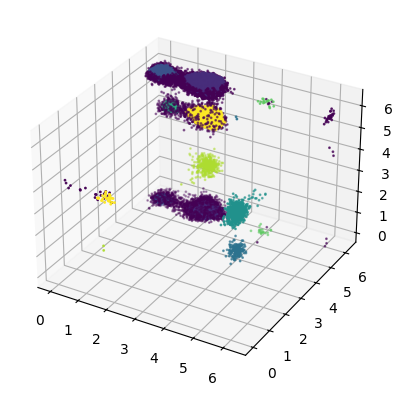

In [62]:
from dadapy import Data
import numpy as np
from matplotlib import pyplot as plt

density_maxk = 100

ds = np.load("/home/angiod@usi.ch/PHASE/data/projects/prod/systems/api/descriptors/Active_descriptors.npz")
ds2 = np.load("/home/angiod@usi.ch/PHASE/data/projects/prod/systems/api/descriptors/Inactive_descriptors.npz")
sel = 'res_2'
emb = np.vstack([ds[sel][:, 0], ds2[sel][:, 0]])
n = emb.shape[0]
emb = emb - (-np.pi)
dp_maxk = max(1, min(int(density_maxk), n - 1))
dp_data = Data(coordinates=emb[:, :], maxk=dp_maxk, verbose=False, n_jobs=1, period=2*np.pi)
dp_data.compute_distances()
dp_data.compute_id_2NN()
dp_data.compute_density_kstarNN()
labels, labels_halo = dp_data.compute_clustering_ADP(Z=1.65)
print(np.unique(labels))
print(np.unique(labels_halo))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(emb[:, 0], emb[:, 1], emb[:, 2], c=labels_halo, s=1)
plt.show()

In [55]:
ds = np.load("/home/angiod@usi.ch/PHASE/data/projects/prod/systems/api/descriptors/Active_descriptors.npz")
ds2 = np.load("/home/angiod@usi.ch/PHASE/data/projects/prod/systems/api/descriptors/Inactive_descriptors.npz")
emb = np.vstack([ds['res_2'][:, 0], ds2['res_2'][:, 0]])
emb.shape

(99997, 3)

In [ ]:
def evaluate_grid():
    X,Y = np.mgrid[-30:50:1, -30:50:1]
    new_emb = np.vstack((X.flatten(), Y.flatten())).T
    nohalo_labels, halo_labels, _, _ = dp_data.predict_cluster_ADP(
            new_emb,
            maxk=max(1, min(int(density_maxk), new_emb.shape[0] - 1)),
            density_est="kstarNN",
            n_jobs=1
        )

    total_emb = np.vstack([emb, new_emb])
    total_labels = np.concatenate([labels, nohalo_labels])
    plt.scatter(total_emb[:, 0], total_emb[:, 1], c=total_labels, s=1)
    plt.show()
    total_labels = np.concatenate([labels, halo_labels])
    plt.scatter(total_emb[:, 0], total_emb[:, 1], c=total_labels, s=1)
    plt.show()
    return halo_labels

In [ ]:
halo_labels = evaluate_grid()

In [ ]:
halo_labels.min()

In [ ]:
import pickle
with open('data.pkl', 'wb') as outp:  # Overwrites any existing file.
    pickle.dump(dp_data, outp, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('data.pkl', 'rb') as inp:
    dp_data_loaded = pickle.load(inp)

Test on real SER2 data

In [ ]:
import numpy as np
from phase.workflows.clustering import _fit_density_peaks, _predict_cluster_adp

data = np.load("/home/angiod@usi.ch/PHASE/API-Active_descriptors.npz")
samples = data['res_2'][:, 0]

dp_data, labels, k_final, diag = _fit_density_peaks(
    samples,
    density_maxk=100,
    density_z="auto",
    halo=True,
)

labels_fit = _predict_cluster_adp(
    dp_data,
    samples,
    density_maxk=100,
    halo=False,
)

In [ ]:
q[labels == -1]

In [ ]:
labels_fit[labels == -1]

In [ ]:
import numpy as np
from phase.scripts.cluster_npz import _fit_density_peaks, _predict_cluster_adp

data = np.load("/home/angiod@usi.ch/PHASE/API-Active_descriptors.npz")
samples = data['assigned__labels_assigned'] # (475, 300)
cluster_counts = data['assigned__cluster_counts'] # (300,)


dp_data, labels, k_final, diag = _fit_density_peaks(
    samples: np.ndarray,
    *,
    density_maxk: int,
    density_z: float | str,
    halo: bool,
) -> tuple[Data, np.ndarray, int, Dict[str, Any]]:

def _predict_cluster_adp(
    dp_data: Data,
    samples: np.ndarray,
    *,
    density_maxk: int,
    halo: bool,
    n_jobs: int | None = None,
) -> np.ndarray: